In [1]:
import pickle

In [3]:
with open('outs.pkl','rb') as f:
    ds = pickle.load(f)

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('data/it_mk_keywords.csv')

In [17]:
df['date'] = df['text'].apply(lambda x: " ".join(x.split()[:3]))

In [22]:
df['kw_count'] = df['tags'].apply(lambda x: len(x.split(';')) if type(x) == str else 0)

<AxesSubplot:ylabel='Frequency'>

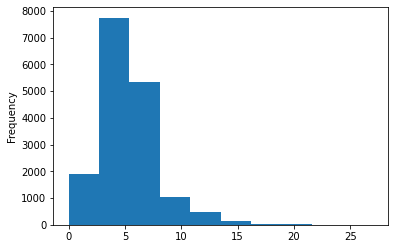

In [23]:
df['kw_count'].plot.hist()

In [25]:
df[df['kw_count'] == max(df['kw_count'])]

id                                                url  \
14817  post-16445     https://it.mk/onlajn-potraga-po-nov-avtomobil/   
14915  post-15204  https://it.mk/makedonija-spored-google-autocom...   
15162  post-12498  https://it.mk/najvlijatelnite-lichnosti-vo-it-...   

                                                    text  \
14817  \n\n4 јануари 2011\n\nво Веб, ИТ.МК  \n\n4 јан...   
14915  \n\n6 декември 2010\n\nво Веб, ИТ.МК  \n\n6 де...   
15162  \n\n28 септември 2010\n\nво ИТ.МК  \n\n28 септ...   

                                                    tags               date  \
14817  Audi;BMW;Chevrolet;Citroen;CSS;Dacia;Flash;For...     4 јануари 2011   
14915  берово;битола;богданци;валандово;велес;виница;...    6 декември 2010   
15162  Alexandria;CableTel;GORD Systems;INet;InfoProj...  28 септември 2010   

       kw_count  
14817        27  
14915        27  
15162        27

In [46]:
df['category_count'] = df['text'].apply(lambda x : len(x.split()[4].split(',')))

In [48]:
df.groupby('category_count').size()

category_count
1    10322
2     6367
dtype: int64

In [2]:
main_link = "https://it.mk/sodrzhina/page/2/"

In [6]:
import requests
from bs4 import BeautifulSoup
URL = main_link
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")

#print(page.text)

In [20]:
import os
os.listdir()

['.git', '.ipynb_checkpoints', 'README.md', 'itmk-scrape.ipynb', 'data']

In [ ]:
f = open('data/it_mk.json','w')


In [23]:
f = open('data/it_mk.json','w')
import json
import tqdm
for page in tqdm.tqdm(range(1,1866),total=1865):
    URL = f"https://it.mk/sodrzhina/page/{page}/"

    page = requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")

    for a in soup.find_all('article'):
        id = a['id']
        curr_link = a.find("a")['href']
        curr_map = {'id':id,'url':curr_link}
        #link = json.loads(curr_map)
        f.write(json.dumps(curr_map, ensure_ascii=False)+"\n")

100%|██████████| 1865/1865 [16:40<00:00,  1.86it/s]


In [48]:
f = open('it_mk.json','r')
f2 = open('it_mk_txts.json','w', encoding='utf-8')

for i, line in tqdm.tqdm(enumerate(f)):
    if i < 5463: continue
    line = json.loads(line)
    URL = line['url']
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")
    try:
        xs = soup.find_all('p')
        texts = " ".join([p.text for p in xs])
    except:
        texts = ""
    try:
        ys = soup.find('div', {"class":'bottom-tags'}).find_all('a')
        ys = ";".join([y.text for y in ys])
    except:
        ys = ""
    line['text'] = texts
    line['tags'] = ys
    #print(line)
    f2.write(json.dumps(line, ensure_ascii=False)+"\n")


5464it [00:00, 11705.64it/s]